<a href="https://colab.research.google.com/github/Babulsec01/Dip-lab-final/blob/main/Dip_lab_final_2019331538.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from skimage.color import rgb2gray
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


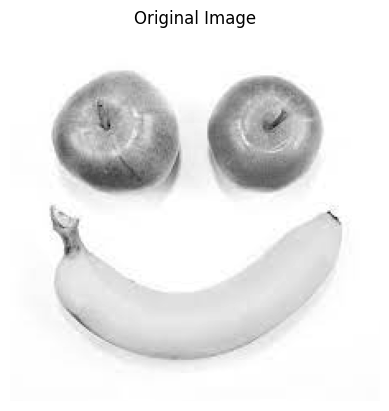

Image dimensions: 225 x 225


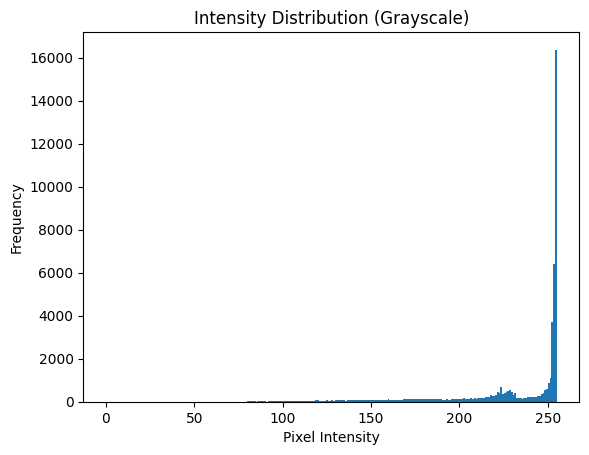

Intensity range: 5 - 255


In [ ]:
#task-1
#Upload the image(DIP_Lab_task_01.png) from drive with extracting details like:
#image dimension, frequency distribution of intensities, range.


image_path_1=io.imread('/content/drive/MyDrive/Colab Notebooks/dip/DIP_Lab_task_01.png')

#showing original image
plt.imshow(image_path_1, cmap='gray')
plt.axis('off')
plt.title("Original Image")
plt.show()


# Image Dimensions
height, width = image_path_1.shape[:2]
print(f"Image dimensions: {width} x {height}")
pixels = image_path_1.flatten()

if len(image_path_1.shape) == 2:
    plt.hist(pixels, bins=256, range=(0,255))
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title("Intensity Distribution (Grayscale)")
    plt.show()
elif len(image_path_1.shape) == 3:
    for i, color in enumerate(['Red', 'Green', 'Blue']):
      plt.hist(pixels[i::3], bins=256, range=(0,255), alpha=0.7, label=color)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title("Intensity Distribution (Color)")
    plt.legend()
    plt.show()
else:
    print("The image type is not supported.")

min_intensity = np.min(pixels)
max_intensity = np.max(pixels)
print(f"Intensity range: {min_intensity} - {max_intensity}")


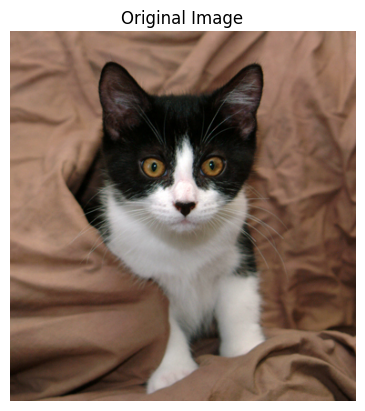

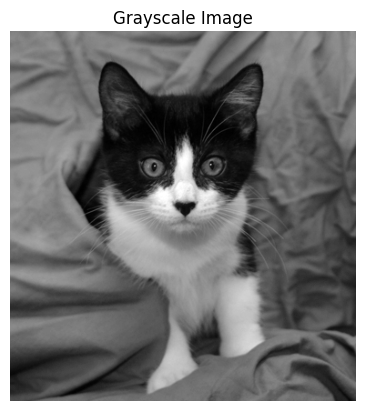

Original Image Sub-Region:
[[[161 124 106]
  [162 127 107]
  [164 128 106]
  [164 127 108]
  [164 127 111]]

 [[159 120 103]
  [160 122 101]
  [161 124 105]
  [163 124 109]
  [164 125 108]]

 [[155 120 100]
  [159 122 103]
  [162 125 106]
  [163 126 108]
  [163 126 107]]

 [[155 120 100]
  [158 121 102]
  [162 124 103]
  [164 126 107]
  [164 128 112]]

 [[158 123 103]
  [157 125 102]
  [162 125 107]
  [163 124 109]
  [163 126 108]]]

Grayscale Image Sub-Region:
[[0.51201843 0.52155098 0.52574039 0.52350039 0.52434863]
 [0.49828157 0.50416039 0.51173569 0.51453333 0.51788941]
 [0.4941     0.50389255 0.51565725 0.51986157 0.51957882]
 [0.4941     0.49997098 0.51200353 0.52041216 0.52743686]
 [0.50586471 0.51035961 0.51594    0.51453333 0.51986157]]

Average intensity of the original sub-region: 130.4
Average intensity of the grayscale sub-region: 0.5130932862745098


In [ ]:
#task -2
#Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and
#compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison).

image_path_2=io.imread('/content/drive/MyDrive/Colab Notebooks/dip/DIP_Lab_task_02.jpg')

#Showing original image
plt.imshow(image_path_2)
plt.axis('off')
plt.title("Original Image")
plt.show()

gray_image = rgb2gray(image_path_2)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()

# Define the sub-region (5x5)
x = 10
y = 10
sub_region_original = image_path_2[y:y+5, x:x+5]
sub_region_gray = gray_image[y:y+5, x:x+5]
print("Original Image Sub-Region:")
print(sub_region_original)
print("\nGrayscale Image Sub-Region:")
print(sub_region_gray)

avg_original = np.mean(sub_region_original)
avg_gray = np.mean(sub_region_gray)
print("\nAverage intensity of the original sub-region:", avg_original)
print("Average intensity of the grayscale sub-region:", avg_gray)



Possible salt and pepper noise detected.


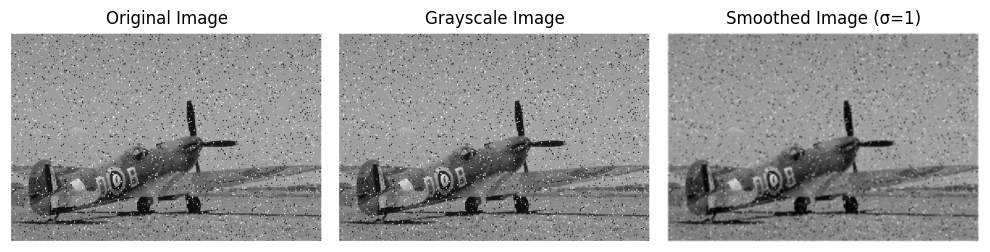

In [ ]:
#task-3
#Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied.
# Identify the noise(if any) before processing.
image_path_3=io.imread('/content/drive/MyDrive/Colab Notebooks/dip/DIP_Lab_task_03.png')

gray_image = rgb2gray(image_path_3)

noisy_pixels = np.where((gray_image == 0) | (gray_image == 1))
if len(noisy_pixels[0]) > 0:
    print("Possible salt and pepper noise detected.")



sigma = 1
smoothed_image = filters.gaussian(gray_image, sigma=sigma)

# Display the original, grayscale, and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_path_3)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title(f"Smoothed Image (σ={sigma})")
plt.axis('off')
plt.tight_layout()
plt.show()


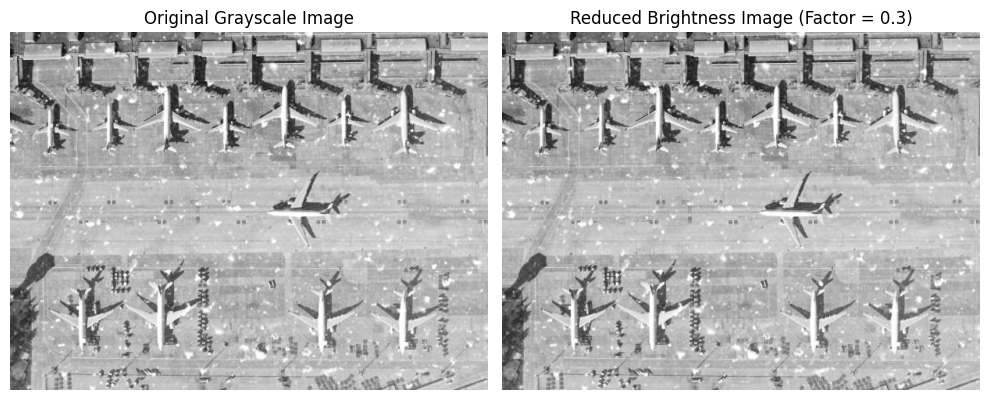

In [ ]:
#task-4
#Implement an appropriate technique to reduce the brightness of
#the provided image (DIP_Lab_task_04.jpg) effectively
image_path_4=io.imread('/content/drive/MyDrive/Colab Notebooks/dip/DIP_Lab_task_04.jpg')

if len(image_path_4.shape) == 3:
    gray_image = rgb2gray(image_path_4)
else:
    gray_image = image_path_4

factor = 0.3
reduced_brightness_image = gray_image * factor
reduced_brightness_image = np.clip(reduced_brightness_image, 0, 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reduced_brightness_image, cmap='gray')
plt.title(f"Reduced Brightness Image (Factor = {factor})")
plt.axis('off')
plt.tight_layout()
plt.show()

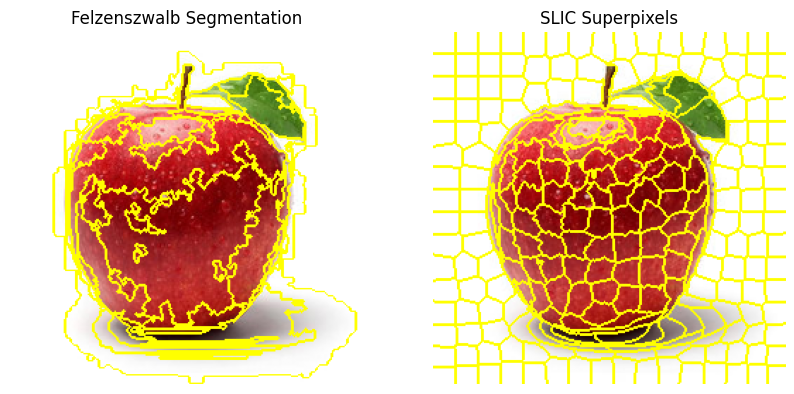

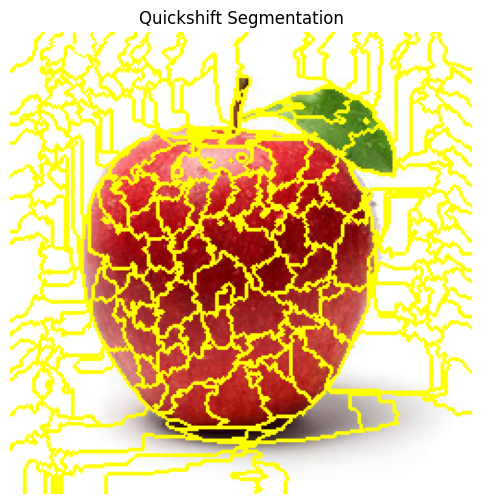

In [ ]:
#task-5
#Solve the segmentation problem for the given image:

image_path_5=io.imread('/content/drive/MyDrive/Colab Notebooks/dip/DIP_Lab_task_05.jpg')

segments_fz = felzenszwalb(image_path_5, scale=100, sigma=0.5, min_size=50)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mark_boundaries(image_path_5, segments_fz))
plt.title("Felzenszwalb Segmentation")
plt.axis('off')

segments_slic = slic(image_path_5, n_segments=250, compactness=10, sigma=1)
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image_path_5, segments_slic))
plt.title("SLIC Superpixels")
plt.axis('off')
plt.show()

segments_quick = quickshift(image_path_5, kernel_size=3, max_dist=6, ratio=0.5)
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(image_path_5, segments_quick))
plt.title("Quickshift Segmentation")
plt.axis('off')
plt.show()